In [40]:
#TRABAJO PRACTICO MATEMATICA 3
#SEBASTIAN RODRIGUEZ
#DNI: 39269394

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [42]:
def resolver_ruta(ruta_relativa):
    if hasattr(sys, '_MEIPASS'):
        return os.path.join(sys._MEIPASS, ruta_relativa)
    return os.path.join(os.path.abspath('.'), ruta_relativa)

In [43]:
dataset = pd.read_csv(resolver_ruta('seguro.csv'))

print('Dimensiones del data set: ' + str(dataset.shape))

print('\nSus primeras filas en modo de ejemplo: \n' + str(dataset.head()))

print('\nLas variables a analizar seran la edad, el bmi, la region y la cantidad de hijos')
labelencoder = LabelEncoder()
variables_a_analizar = dataset[['age', 'bmi', 'region', 'children']]

print('\nA la region se la transforma para poder ser analizada')
variables_a_analizar['region'] = labelencoder.fit_transform(variables_a_analizar['region'])

print('Ejemplo de como quedaria northeast: ' + str(variables_a_analizar['region'][10]))
print('Ejemplo de como quedaria northwest: ' + str(variables_a_analizar['region'][3]))
print('Ejemplo de como quedaria southeast: ' + str(variables_a_analizar['region'][1]))
print('Ejemplo de como quedaria southwest: ' + str(variables_a_analizar['region'][0]))

print('\nA modo de analisis: \n' + str(variables_a_analizar.describe()))

print('\nCon esto podemos ver estos datos que nos seran muy utiles: ')
print('La edad minima es 18 años y que la maxima es 64')
print('El ibm minimo es 6 y el maximo es 53')
print('La cantidad de hijos minima es 0 y la maxima 5')


print('\n\nNuestra variable a la cual se le contrastaran las variables anteriores sera charges')
variable_de_contraste = dataset[['charges']]

print('\nA modo de analisis: \n' + str(variable_de_contraste.describe()))



print("\nPor ultimo puedo notar que todas las variables dieron un count de 1338, para corroborar que no hay ningun NaN puedo hacer: \n" + str(dataset.isnull().any()))


Dimensiones del data set: (1338, 7)

Sus primeras filas en modo de ejemplo: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Las variables a analizar seran la edad, el bmi, la region y la cantidad de hijos

A la region se la transforma para poder ser analizada
Ejemplo de como quedaria northeast: 0
Ejemplo de como quedaria northwest: 1
Ejemplo de como quedaria southeast: 2
Ejemplo de como quedaria southwest: 3

A modo de analisis: 
               age          bmi       region     children
count  1338.000000  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.515695     1.094918
std      14.049960     6.098187     1.104885     1.205

Chequeo donde esta la mayor concentracion de datos en charges por si eventualmente requiero hacer un corte


<AxesSubplot:xlabel='charges', ylabel='Density'>

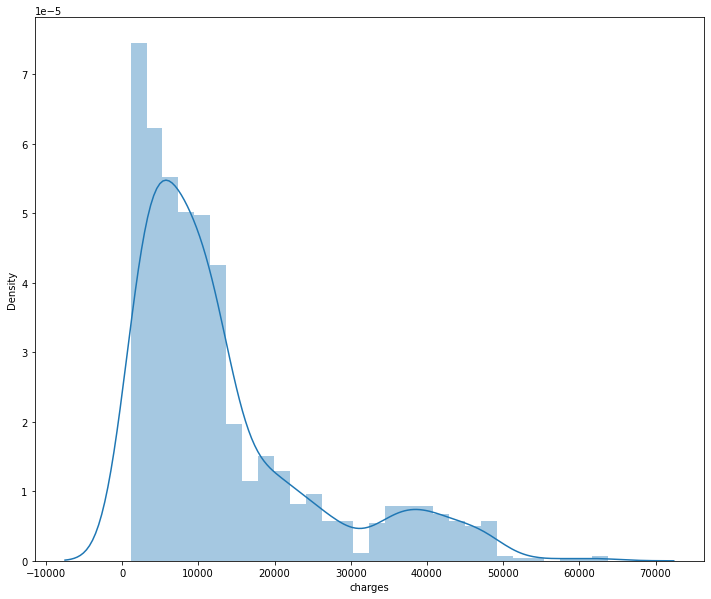

In [44]:
print("Chequeo donde esta la mayor concentracion de datos en charges por si eventualmente requiero hacer un corte")
plt.figure(figsize=(12,10))
plt.tight_layout()
seabornInstance.distplot(variable_de_contraste['charges'])


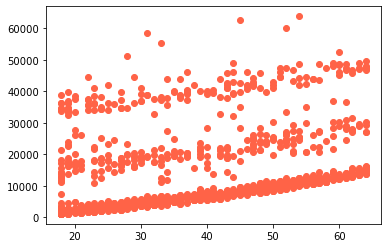

In [45]:

#Gráfico de entrenamiento
plt.scatter(variables_a_analizar['age'], variable_de_contraste['charges'], color = "#FF6347")
plt.show()

In [46]:

print("Dividimos los datos en conjunto de entrenamiento y conjunto de test")
X_train, X_test, y_train, y_test = train_test_split(variables_a_analizar[['age']], variable_de_contraste['charges'], test_size=0.2, random_state=0)

print("\nX_Train escalado: \n", X_train.head())
print("\nX_Test escalado: \n", X_test.head())
print("\nY_Train escalado: \n", y_train.head())
print("\nY_Test escalado: \n", y_test.head())

print("\nEntrenamos dichos datos")
regressor = LinearRegression()
regressor.fit(X_train, y_train)

yPredTest=regressor.predict(X_test)
yPredTrain=regressor.predict(X_train)

df = pd.DataFrame({'Actual': y_test, 'Predicted': yPredTest.flatten()})
print(df)


Dividimos los datos en conjunto de entrenamiento y conjunto de test

X_Train escalado: 
       age
621    37
194    18
240    23
1168   32
1192   58

X_Test escalado: 
       age
578    52
610    47
569    48
1034   61
198    51

Y_Train escalado: 
 621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

Y_Test escalado: 
 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

Entrenamos dichos datos
           Actual     Predicted
578    9724.53000  16278.180298
610    8547.69130  15086.322450
569   45702.02235  15324.694020
1034  12950.07120  18423.524425
198    9644.25250  16039.808729
...           ...           ...
1084  15019.76005  18661.895995
726    6664.68595  13656.093033
1132  20709.02034  17470.038146
725   40932.42950  11034.005767
963    9500.57305  14847.950881

[268 rows x 2 columns]


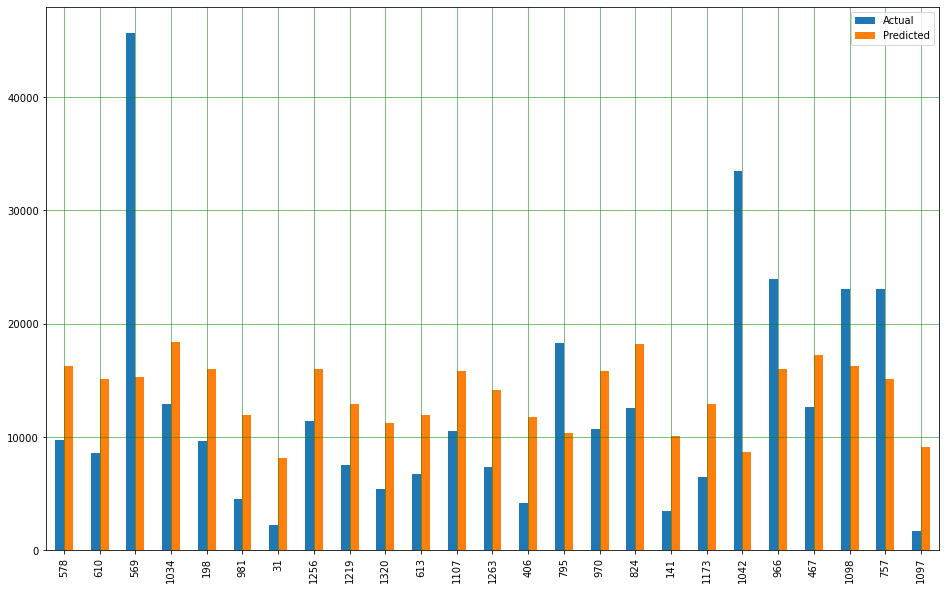

In [47]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

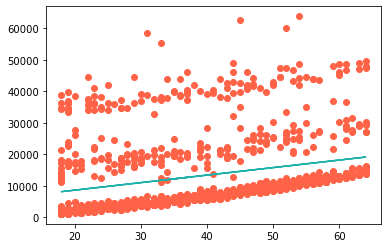

In [51]:
#filtered_data = infoUse.query('charges<=15000')

plt.scatter(X_train, y_train, color = "#FF6347")
plt.plot(X_train, regressor.predict(X_train), color = "#20B2AA")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()